## 数据归一化
解决方案：将所有的数据映射到同一尺度  
最值归一化 Normalization：把所有数据映射到0-1之间，其实就是比例法  
Xscale=(x-xmin)/(xmax-xmin)  
适用于分布有明显边界的情况；受outlier影响较大：比如收入受异常点影响较大  

除非是考试分数和图像像素值分布，否则都使用均值方差归一化standardization   
数值分布没有明显的边界：有可能存在极端数据值  
均值方差归一化：把所有数据归一到均值为0方差为1的分布中  
Xscale=(x-xmean)/S    
方差为1什么意思？有什么直观的解释？  
为什么要把整数矩阵化为浮点数？归一化之后不是就是浮点数了吗？/ 为什么要让样本数据矩阵是float类型？
因为最值归一化是将所有的值归一化到[0,1]之间，所以是float类型，所以原始的矩阵元素也应该是float类型，所以把矩阵强制类型转换一下，否则待会归一化都变成0/1。

In [3]:
import numpy as np
import matplotlib.pyplot as plt

##  最值归一化Normalization

In [4]:
x = np.random.randint(0, 100, 100)
# 写成更人性化的形式
x = np.random.randint(0, 100, size=100)

In [5]:
print(x) # 只会打印数据本身的组织形式

[24 98 50 19 80 82 12 68 36 71 36 65 35 42 31 83 69 80 88 81 60 80  4 70 82
 73 42 81 42 80 62 92 16 76 11 48 26 45 38 48 28 90 26 65 35 39 43 37  4 12
  2 91 19 58 36 69 65 60 62 42 37 93  7 33  2 24 63 86 31 42 59 57  7 97 86
 29 39 44 60 82 17 89 60 90  2 48 37  9 51 69 48 92 43 86 52 50 12  6 80  5]


In [6]:
x # 单独的变量会把数据类型显示出来

array([24, 98, 50, 19, 80, 82, 12, 68, 36, 71, 36, 65, 35, 42, 31, 83, 69,
       80, 88, 81, 60, 80,  4, 70, 82, 73, 42, 81, 42, 80, 62, 92, 16, 76,
       11, 48, 26, 45, 38, 48, 28, 90, 26, 65, 35, 39, 43, 37,  4, 12,  2,
       91, 19, 58, 36, 69, 65, 60, 62, 42, 37, 93,  7, 33,  2, 24, 63, 86,
       31, 42, 59, 57,  7, 97, 86, 29, 39, 44, 60, 82, 17, 89, 60, 90,  2,
       48, 37,  9, 51, 69, 48, 92, 43, 86, 52, 50, 12,  6, 80,  5])

In [7]:
help(np.random.randint)

Help on built-in function randint:

randint(...) method of mtrand.RandomState instance
    randint(low, high=None, size=None, dtype='l')
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    Parameters
    ----------
    low : int
        Lowest (signed) integer to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, i

In [8]:
(x-np.min(x)) / (np.max(x)-np.min(x)) # 对于矩阵也是可以的

array([ 0.22916667,  1.        ,  0.5       ,  0.17708333,  0.8125    ,
        0.83333333,  0.10416667,  0.6875    ,  0.35416667,  0.71875   ,
        0.35416667,  0.65625   ,  0.34375   ,  0.41666667,  0.30208333,
        0.84375   ,  0.69791667,  0.8125    ,  0.89583333,  0.82291667,
        0.60416667,  0.8125    ,  0.02083333,  0.70833333,  0.83333333,
        0.73958333,  0.41666667,  0.82291667,  0.41666667,  0.8125    ,
        0.625     ,  0.9375    ,  0.14583333,  0.77083333,  0.09375   ,
        0.47916667,  0.25      ,  0.44791667,  0.375     ,  0.47916667,
        0.27083333,  0.91666667,  0.25      ,  0.65625   ,  0.34375   ,
        0.38541667,  0.42708333,  0.36458333,  0.02083333,  0.10416667,
        0.        ,  0.92708333,  0.17708333,  0.58333333,  0.35416667,
        0.69791667,  0.65625   ,  0.60416667,  0.625     ,  0.41666667,
        0.36458333,  0.94791667,  0.05208333,  0.32291667,  0.        ,
        0.22916667,  0.63541667,  0.875     ,  0.30208333,  0.41

In [44]:
# 产生一个随机数据集
X = np.random.randint(0, 100, (50, 2))
# np存储的矩阵只能是一种数据类型

In [46]:
X = np.array(X, dtype=float)

In [47]:
X[:10, :] # 取出前10个样本点，索引从0开始的

array([[ 18.,  99.],
       [ 61.,  65.],
       [ 63.,  62.],
       [ 16.,  19.],
       [ 45.,  20.],
       [ 41.,  14.],
       [ 20.,  64.],
       [  5.,  66.],
       [ 10.,   7.],
       [ 13.,  67.]])

In [48]:
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0])-np.min(X[:,0])) # 最大最小归一化

In [49]:
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1])-np.min(X[:,1])) # 最大最小归一化

In [50]:
X[:10,:]

array([[ 0.18556701,  1.        ],
       [ 0.62886598,  0.65656566],
       [ 0.64948454,  0.62626263],
       [ 0.16494845,  0.19191919],
       [ 0.46391753,  0.2020202 ],
       [ 0.42268041,  0.14141414],
       [ 0.20618557,  0.64646465],
       [ 0.05154639,  0.66666667],
       [ 0.10309278,  0.07070707],
       [ 0.13402062,  0.67676768]])

In [14]:
X = np.array(X, dtype=float)

In [15]:
X[:10,:]

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 1.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [16]:
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0])-np.min(X[:,0]))

In [17]:
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1])-np.min(X[:,1]))

In [18]:
X[:10,:]

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 1.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

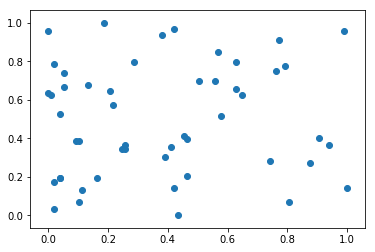

In [51]:
# 绘制点状样本图
plt.scatter(X[:,0], X[:,1])
plt.show()

In [20]:
np.mean(X[:,0])

0.040000000000000001

In [21]:
np.std(X[:,0])

0.19595917942265428

In [22]:
np.mean(X[:,])

0.029999999999999999

In [23]:
np.std(X[:,0])

0.19595917942265428

## 均值方差归一化 Standardization

In [24]:
X2 = np.random.randint(0, 100, size=(50, 2))

In [25]:
X2 = np.array(X2, dtype=float)

In [26]:
# 现在开始计算样本矩阵均值方差归一化
(X2-np.mean(X2)) / np.std(X2) # 注意这里是除以标准差

array([[ 1.08902051, -0.74997636],
       [ 1.0555842 ,  0.42029437],
       [ 1.08902051, -1.51901141],
       [ 1.5571288 , -1.61932033],
       [ 1.08902051, -0.24843176],
       [ 1.65743772, -1.18464835],
       [ 0.11936761, -1.31839357],
       [ 1.49025619, -0.78341267],
       [ 1.25620204,  1.25620204],
       [-1.4521388 , -0.08125023],
       [-0.71654005,  0.75465744],
       [-0.4490496 ,  0.75465744],
       [-0.38217699, -1.01746681],
       [ 0.48716699,  0.01905869],
       [ 0.08593131, -1.21808465],
       [ 1.49025619, -1.51901141],
       [-0.98403051, -0.31530437],
       [ 0.72122114, -1.38526619],
       [-0.9505942 ,  1.59056511],
       [ 1.12245682,  0.28654915],
       [-1.58588403, -0.9505942 ],
       [-1.4521388 ,  1.18932943],
       [ 0.78809375,  0.42029437],
       [-1.11777573,  0.01905869],
       [ 0.98871159, -1.11777573],
       [ 0.88840267,  1.08902051],
       [-0.01437761,  0.01905869],
       [ 1.35651096, -1.01746681],
       [-0.74997636,

In [28]:
# 可以啊，可以对矩阵做数据归一化操作啊，不对吧
(X2[:, 0]-np.mean(X2[:, 0])) / np.std(X2[:, 0])
X2[:, 0] = (X2[:, 0]-np.mean(X2[:, 0])) / np.std(X2[:, 0])

In [29]:
X2[:, 1] = (X2[:, 1]-np.mean(X2[:, 1])) / np.std(X2[:, 1])

In [37]:
X2[:10, :]

array([[ 0.98443859, -0.61654342],
       [ 0.95016148,  0.54486775],
       [ 0.98443859, -1.37975647],
       [ 1.46431812, -1.479306  ],
       [ 0.98443859, -0.11879577],
       [ 1.56714945, -1.04792471],
       [-0.00959759, -1.18065741],
       [ 1.39576391, -0.64972659],
       [ 1.15582414,  1.37444716],
       [-1.62062174,  0.04712011]])

In [38]:
np.mean(X2[:,0])

-6.8833827526759705e-17

In [39]:
np.std(X2[:,0])

1.0

In [40]:
np.mean(X2[:,0])

-6.8833827526759705e-17

In [41]:
np.std(X2[:,0])

1.0

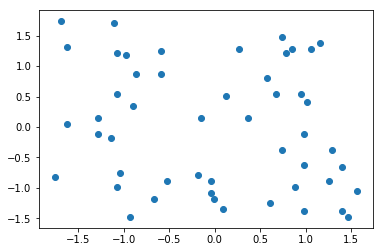

In [31]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()